# Visualization of results from training

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Training progress results

In [7]:
full_baseline = "./full_set_results/cross_entropy/progress"
down_s_results = "./downsample_loss_results/cross_entropy/progress"
aug_d_results = "./results_aug/cross_entropy/progress"

## 1. Output stride hyperparameter on Baseline Architecture

In [8]:
oss = [8, 16, 32]
os_full_dfs_eval = []
os_full_dfs_train = []
for os_ in oss:
    df = pd.read_csv(os.path.join(full_baseline, f'os_{str(os_)}/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(full_baseline, f'os_{str(os_)}/train_results.csv'))
    os_full_dfs_eval.append(df)
    os_full_dfs_train.append(df_2)

### Output stride of 8

In [9]:
os_8_df = os_full_dfs_eval[0]
os_8_df[os_8_df['Mean IoUs'] == os_8_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
69,5,7000,0.449937,0.78913,0.452134,0.236111,0.001857,0.575292,0.63051,0.464526,0.566083,0.820543


### Output stride of 16

In [10]:
os_16_df = os_full_dfs_eval[1]
os_16_df[os_16_df['Mean IoUs'] == os_16_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
69,5,7000,0.44716,0.787532,0.437049,0.214526,0.003413,0.577696,0.642632,0.467274,0.564392,0.819949


### Output stride of 32

In [11]:
os_32_df = os_full_dfs_eval[2]
os_32_df[os_32_df['Mean IoUs'] == os_32_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
51,4,5200,0.451485,0.780046,0.452908,0.243966,0.019894,0.574638,0.616911,0.472033,0.579297,0.815376


### Training Loss visualization

In [12]:
os_8_train_df = os_full_dfs_train[0]
os_16_train_df = os_full_dfs_train[1]
os_32_train_df = os_full_dfs_train[2]

Text(0, 0.5, 'Loss')

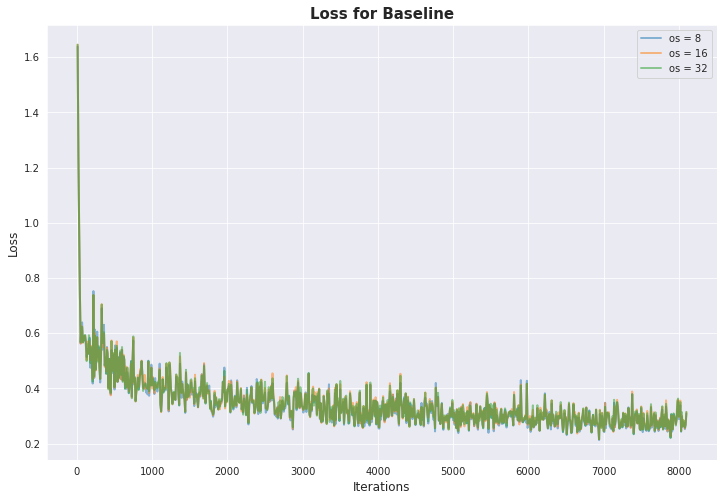

In [13]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(os_8_train_df.Iterations,   os_8_train_df.Loss, label="os = 8", alpha=0.5, linewidth=2)
plt.plot(os_16_train_df.Iterations, os_16_train_df.Loss, label="os = 16", alpha=0.5, linewidth=2)
plt.plot(os_32_train_df.Iterations, os_32_train_df.Loss, label="os = 32", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

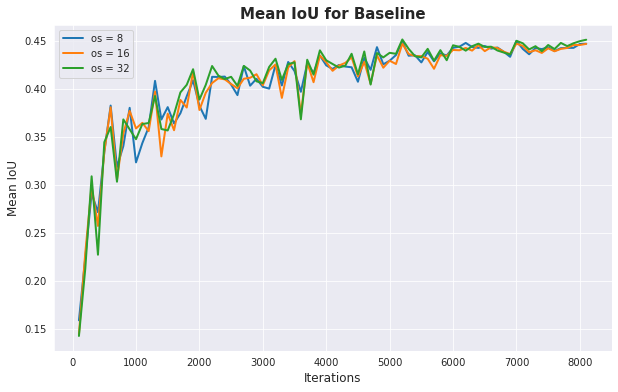

In [14]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(os_8_df.Iterations,  os_8_df['Mean IoUs'], label="os = 8", linewidth=2)
plt.plot(os_16_df.Iterations, os_16_df['Mean IoUs'], label="os = 16", linewidth=2)
plt.plot(os_32_df.Iterations, os_32_df['Mean IoUs'], label="os = 32", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

Text(0, 0.5, 'IoU')

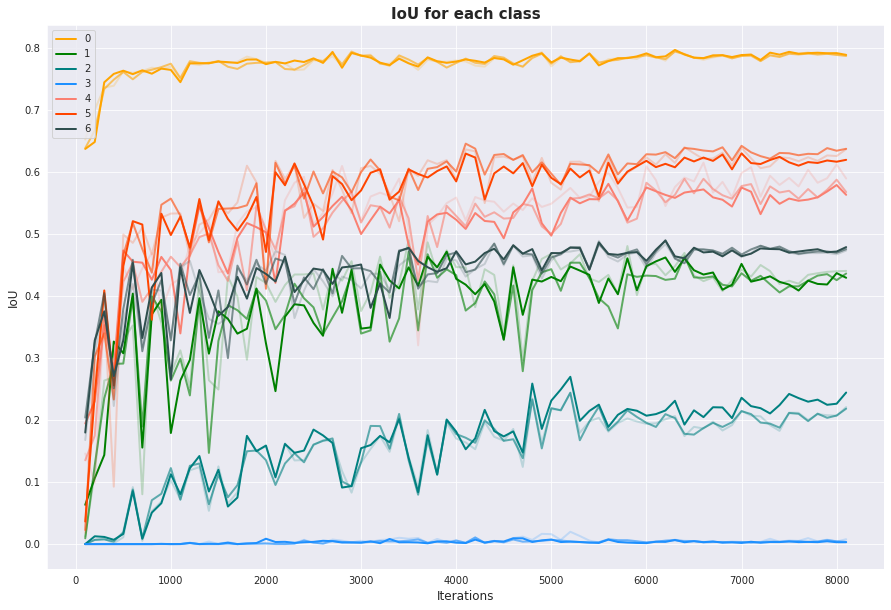

In [15]:
sns.set_style("darkgrid")
plt.subplots(figsize=(15,10))
plt.title("IoU for each class", fontweight = 'bold', fontsize=15)
colors = ['orange', 'green', 'teal', 'dodgerblue', 'salmon', 'orangered', 'darkslategrey']
for class_ in range(0,7):
    plt.plot(os_8_df.Iterations,  os_8_df[f'Class {class_} IoU'], label=class_, color = colors[class_], linewidth=2)
    plt.plot(os_16_df.Iterations,  os_16_df[f'Class {class_} IoU'], color = colors[class_], alpha = 0.6, linewidth=2)
    plt.plot(os_32_df.Iterations,  os_32_df[f'Class {class_} IoU'], color = colors[class_], alpha = 0.2, linewidth=2)

plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('IoU', fontsize=12)

## 2. Loss functions to improve class-imbalance problem on os 32 downsampled images

In [16]:
loss_fns = ['cross_entropy', 'focal_loss', 'acw_loss', 'lovasz_loss']
lossfn_dfs_eval = []
lossfn_dfs_train = []
for loss_fn in loss_fns:
    down_s_results = f"./downsample_loss_results/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(down_s_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(down_s_results, 'os_32/train_results.csv'))
    lossfn_dfs_eval.append(df)
    lossfn_dfs_train.append(df_2)

### Cross entropy loss

In [17]:
cross_e_df = lossfn_dfs_eval[0]
cross_e_df[cross_e_df['Mean IoUs'] == cross_e_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
79,5,8000,0.454499,0.793051,0.508904,0.197857,0.002599,0.594523,0.618103,0.466456,0.562145,0.824335


### Focal loss

In [18]:
focal_loss_df = lossfn_dfs_eval[1]
focal_loss_df[focal_loss_df['Mean IoUs'] == focal_loss_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
79,5,8000,0.453303,0.796266,0.515768,0.18477,0.001247,0.586482,0.617046,0.471539,0.555252,0.827271


### ACW loss

In [19]:
acw_loss_df = lossfn_dfs_eval[2]
acw_loss_df[acw_loss_df['Mean IoUs'] == acw_loss_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
80,6,8100,0.487234,0.785709,0.468695,0.391158,0.028148,0.589389,0.658941,0.488597,0.671632,0.821105


### Lovasz loss

In [20]:
lovasz_loss_df = lossfn_dfs_eval[3]
lovasz_loss_df[lovasz_loss_df['Mean IoUs'] == lovasz_loss_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
69,5,7000,0.35326,0.78024,0.441184,0.001257,0.0,0.457279,0.448918,0.343939,0.442858,0.801029


### Training Loss visualization

In [21]:
cross_e_train_df = lossfn_dfs_train[0]
focal_loss_train_df = lossfn_dfs_train[1]
acw_loss_train_df = lossfn_dfs_train[2]
lovasz_loss_train_df = lossfn_dfs_train[3]

Text(0, 0.5, 'Loss')

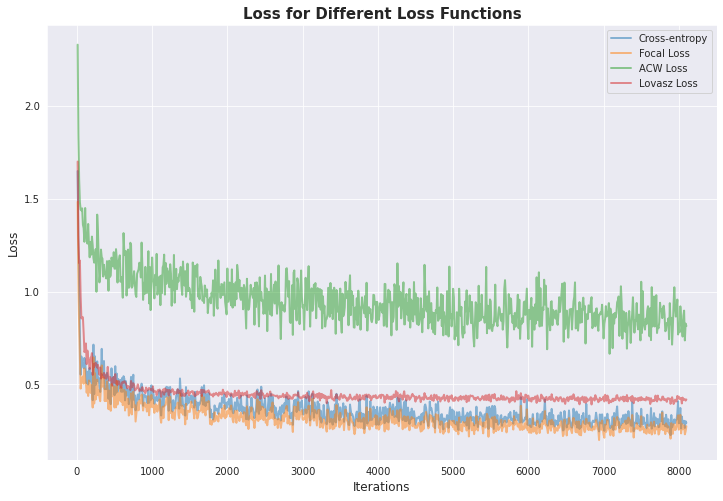

In [22]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(cross_e_train_df.Iterations,   cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
plt.plot(focal_loss_train_df.Iterations, focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
plt.plot(acw_loss_train_df.Iterations, acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
plt.plot(lovasz_loss_train_df.Iterations, lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

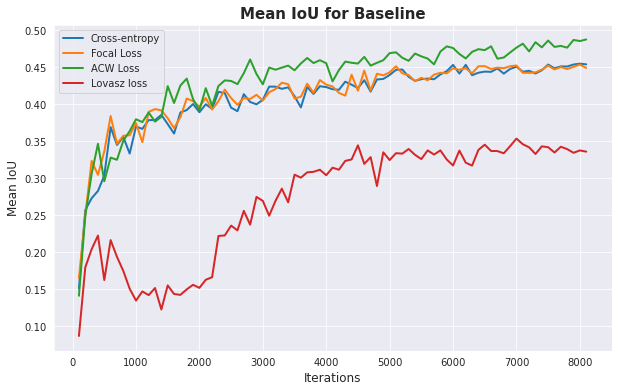

In [23]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(cross_e_df.Iterations,  cross_e_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
plt.plot(focal_loss_df.Iterations, focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
plt.plot(acw_loss_df.Iterations, acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
plt.plot(lovasz_loss_df.Iterations, lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

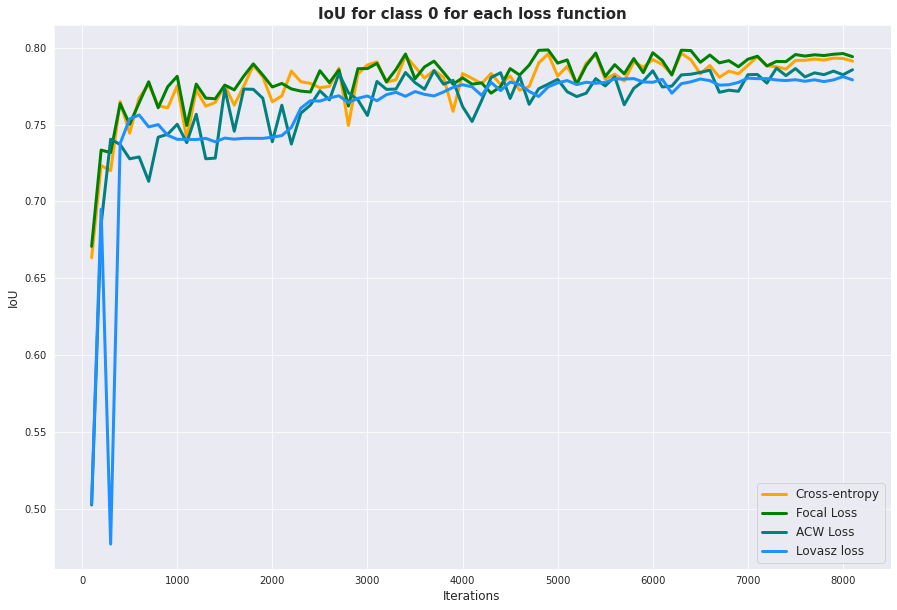

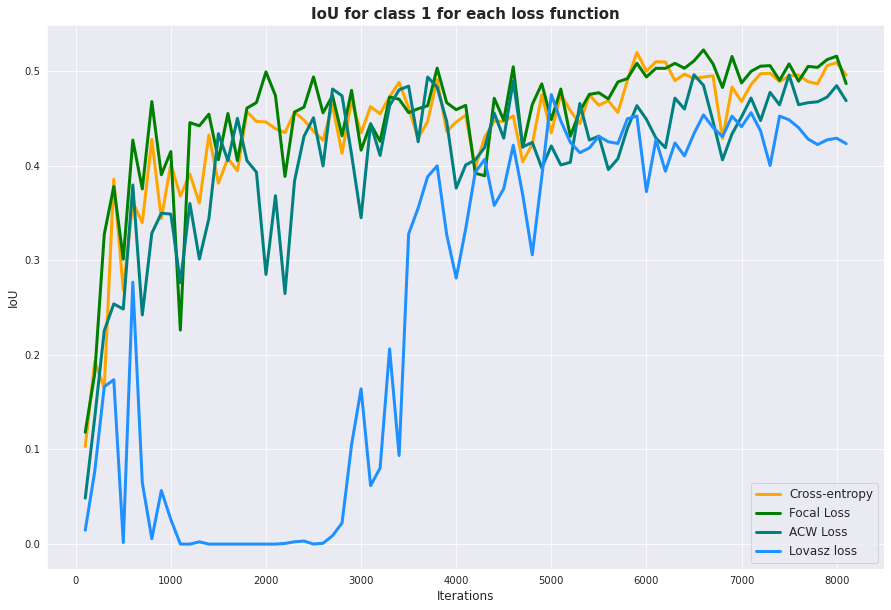

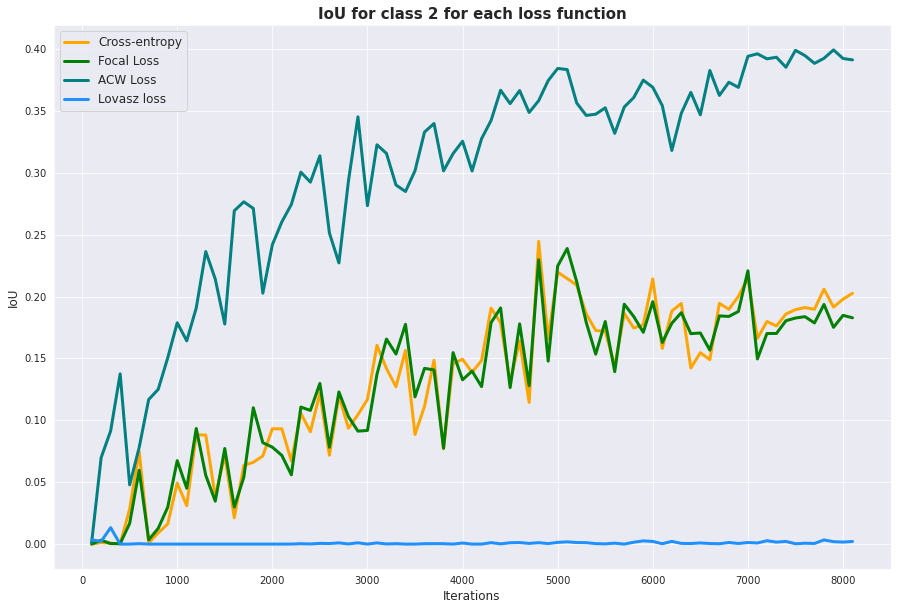

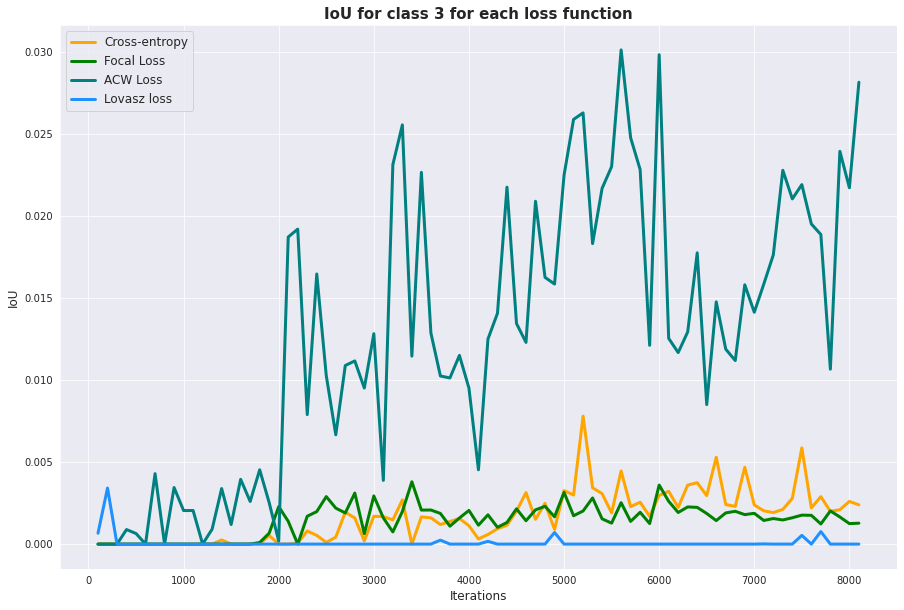

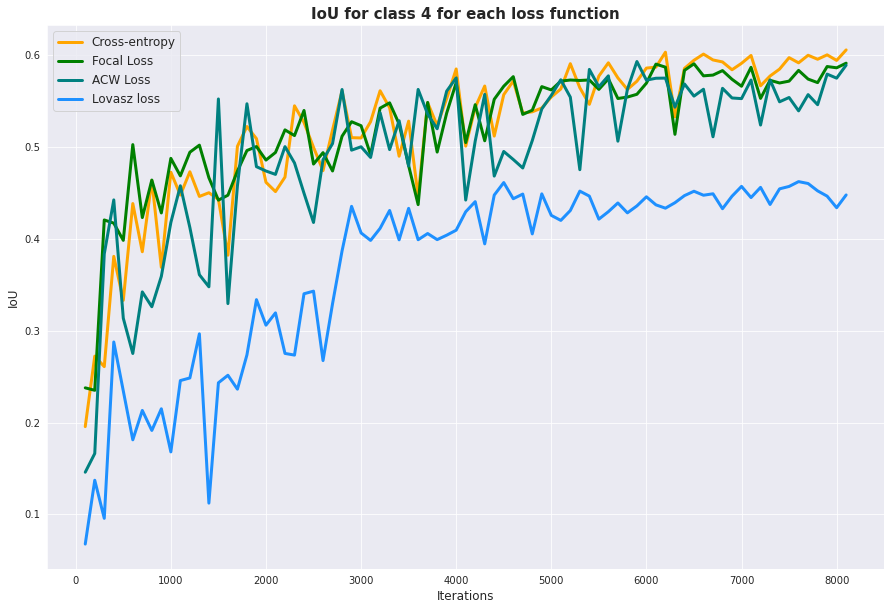

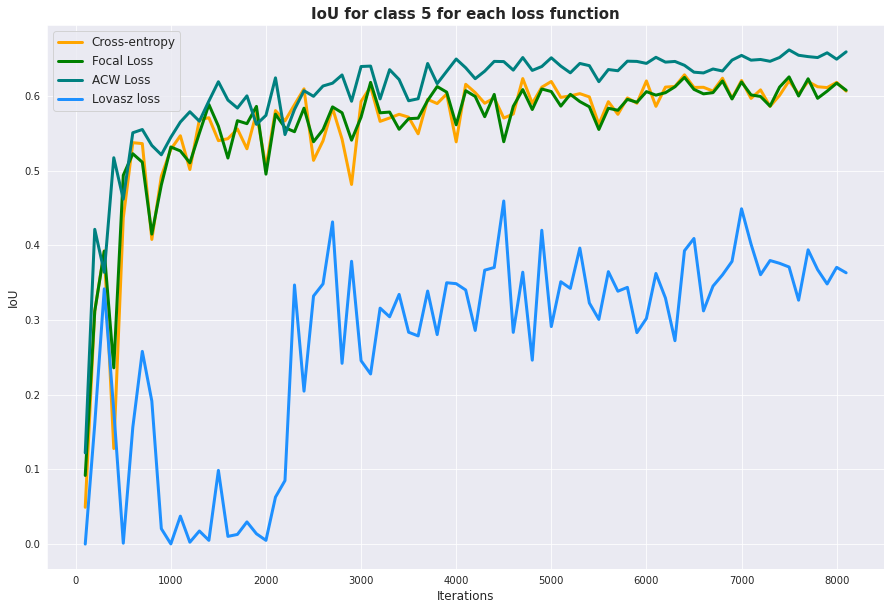

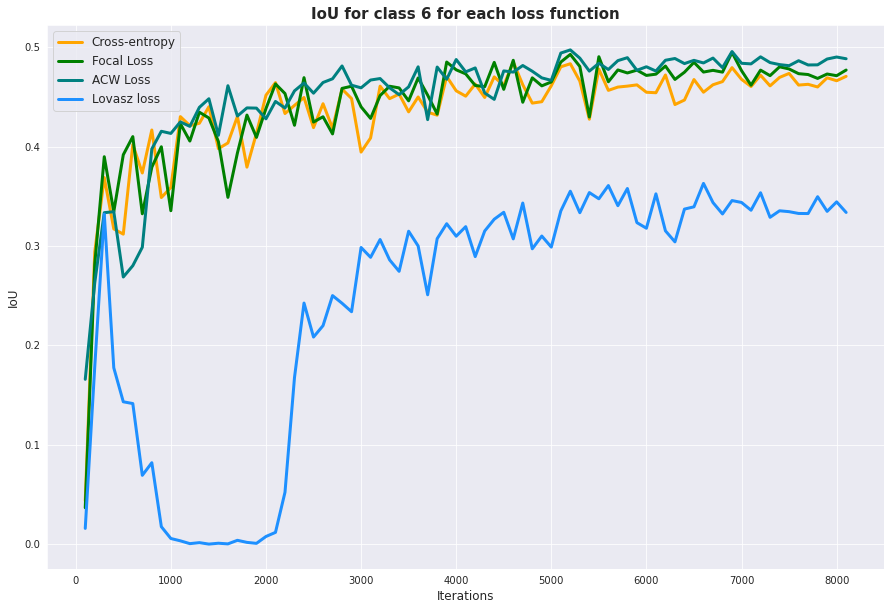

In [24]:
sns.set_style("darkgrid")
colors = ['orange', 'green', 'teal', 'dodgerblue', 'salmon', 'orangered', 'darkslategrey']
for class_ in range(0,7):
    plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(cross_e_df.Iterations,  cross_e_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
    plt.plot(focal_loss_df.Iterations,  focal_loss_df[f'Class {class_} IoU'], 
             label="Focal Loss", color = colors[1], linewidth=3)
    plt.plot(acw_loss_df.Iterations,  acw_loss_df[f'Class {class_} IoU'], 
             label="ACW Loss", color = colors[2], linewidth=3)
    plt.plot(lovasz_loss_df.Iterations, lovasz_loss_df[f'Class {class_} IoU'], 
             label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    plt.show()

## 3. Results of using augmented data

## 3.1 Augmentation 1

In [25]:
loss_fns = ['cross_entropy', 'focal_loss', 'acw_loss']#, 'lovasz_loss']
aug1_dfs_eval = []
aug1_dfs_train = []
for loss_fn in loss_fns:
    aug1_results = f"./results_augmentations/aug_1/deeplabv3plus_resnet50/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(aug1_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(aug1_results, 'os_32/train_results.csv'))
    aug1_dfs_eval.append(df)
    aug1_dfs_train.append(df_2)

### ACW Augmented loss

### Cross entropy loss

In [26]:
aug1_cross_df = aug1_dfs_eval[0]
aug1_cross_df[aug1_cross_df['Mean IoUs'] == aug1_cross_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
79,5,8000,0.439826,0.790793,0.495189,0.096075,0.002088,0.601343,0.625218,0.468078,0.543954,0.822485


### Focal loss

In [27]:
aug1_focal_loss_df = aug1_dfs_eval[1]
aug1_focal_loss_df[aug1_focal_loss_df['Mean IoUs'] == aug1_focal_loss_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
66,5,6700,0.432411,0.787152,0.507414,0.075208,0.000198,0.571335,0.619171,0.466399,0.540142,0.819809


### ACW loss

In [28]:
aug1_acw_loss_df = aug1_dfs_eval[2]
aug1_acw_loss_df[aug1_acw_loss_df['Mean IoUs'] == aug1_acw_loss_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
58,4,5900,0.462084,0.783088,0.492974,0.237072,0.033735,0.572853,0.630812,0.484051,0.625819,0.818451


### Lovasz loss

In [29]:
# aug1_lovasz_df = aug1_dfs_eval[3]
# aug1_lovasz_df[aug1_lovasz_df['Mean IoUs'] == aug1_lovasz_df['Mean IoUs'].max()]

### Training Loss visualization

In [30]:
aug1_cross_e_train_df = aug1_dfs_train[0]
aug1_focal_loss_train_df = aug1_dfs_train[1]
aug1_acw_loss_train_df = aug1_dfs_train[2]
#aug1_lovasz_loss_train_df = aug1_dfs_train[3]

Text(0, 0.5, 'Loss')

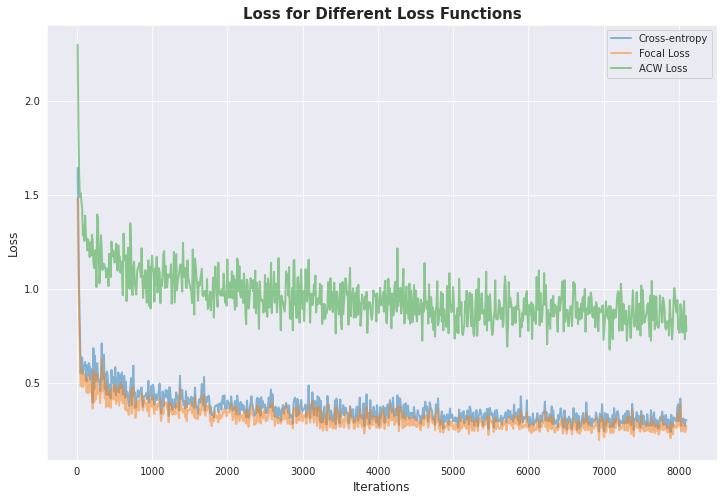

In [31]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(aug1_cross_e_train_df.Iterations, aug1_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
plt.plot(aug1_focal_loss_train_df.Iterations, aug1_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
plt.plot(aug1_acw_loss_train_df.Iterations, aug1_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
#plt.plot(aug1_lovasz_loss_train_df.Iterations, aug1_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

Text(0, 0.5, 'Mean IoU')

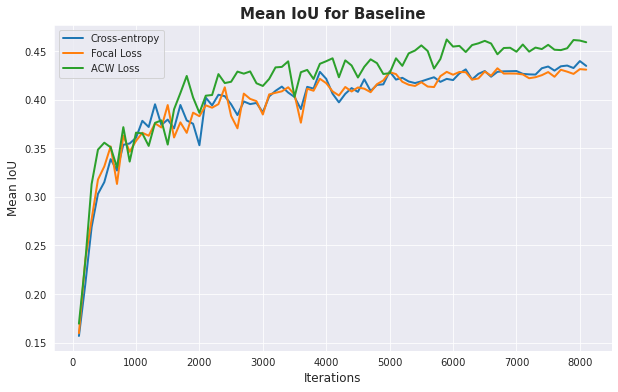

In [32]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(aug1_cross_df.Iterations, aug1_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
plt.plot(aug1_focal_loss_df.Iterations, aug1_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
plt.plot(aug1_acw_loss_df.Iterations, aug1_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
#plt.plot(aug1_lovasz_loss_df.Iterations, aug1_lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

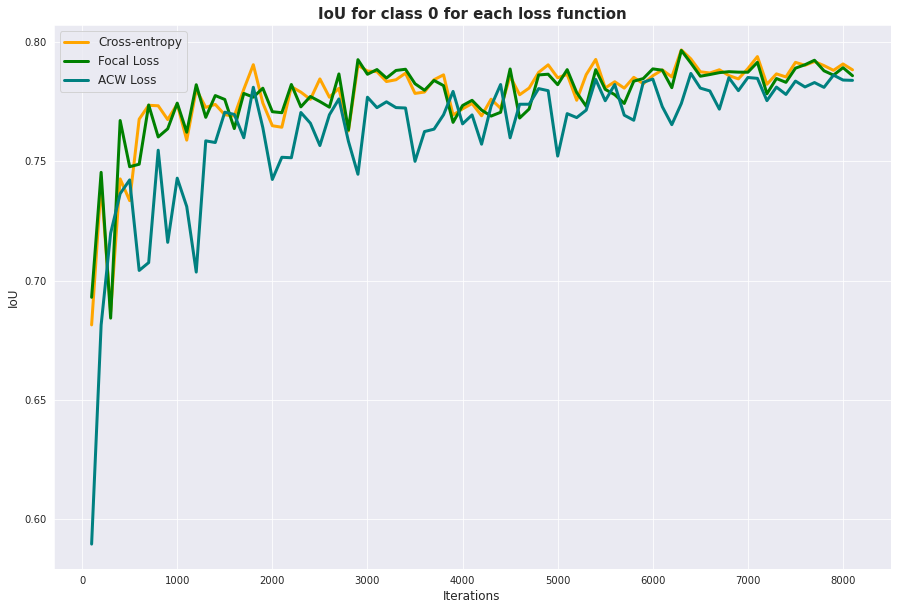

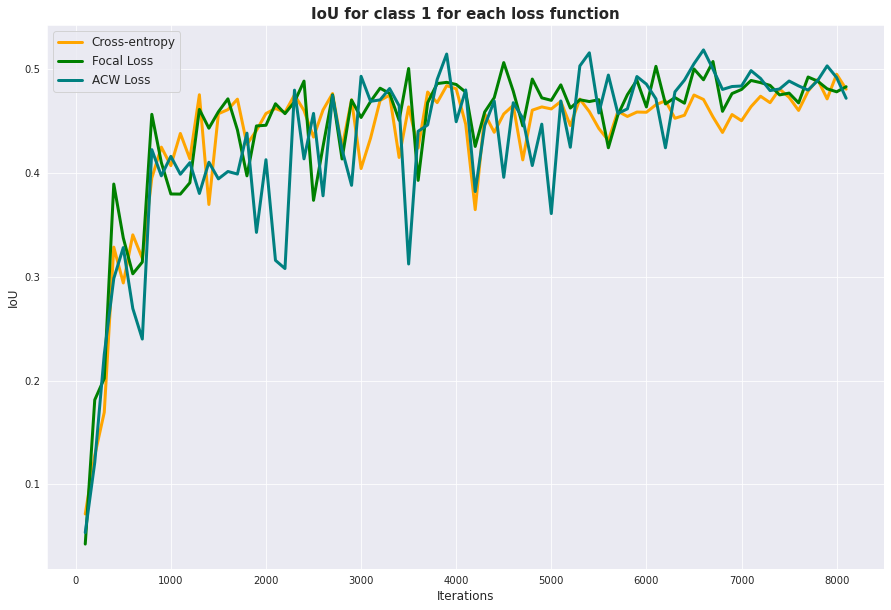

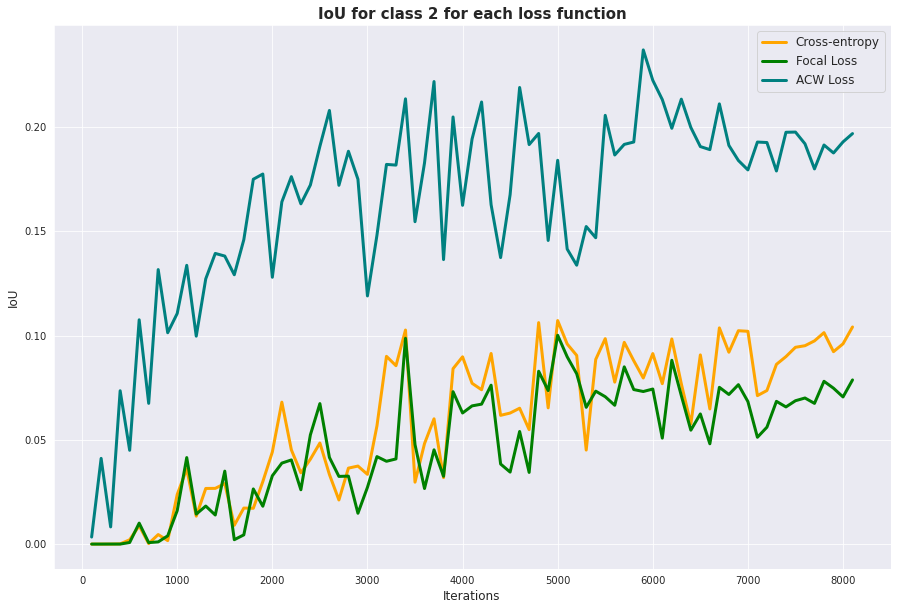

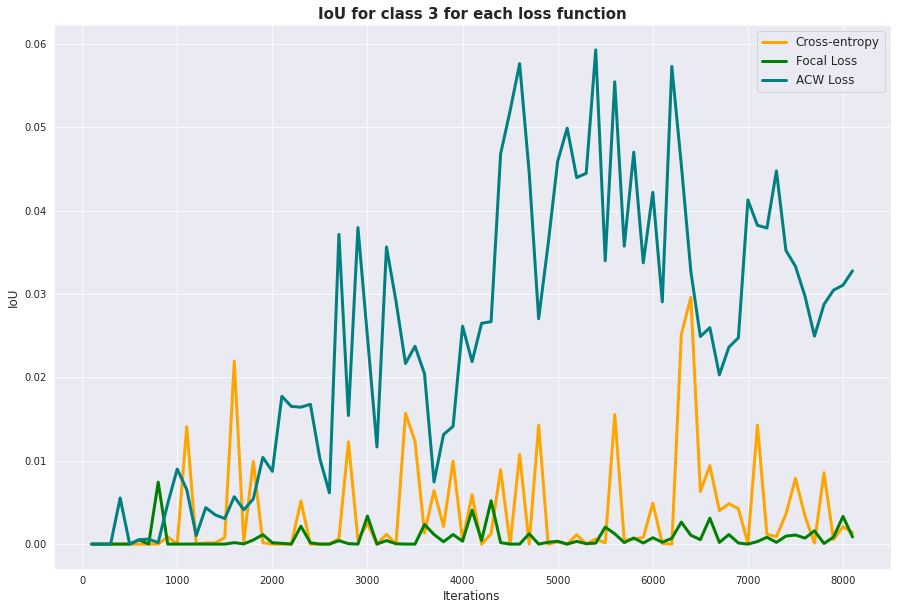

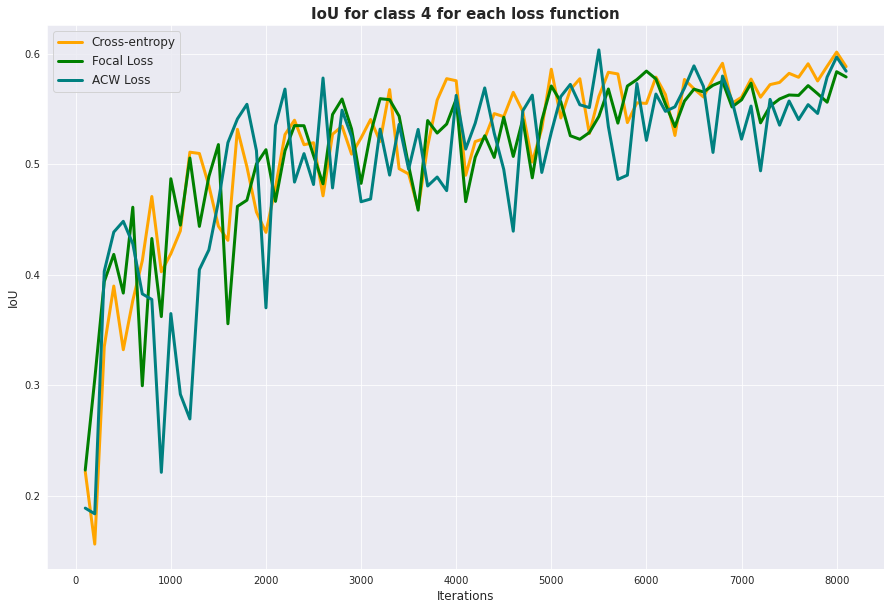

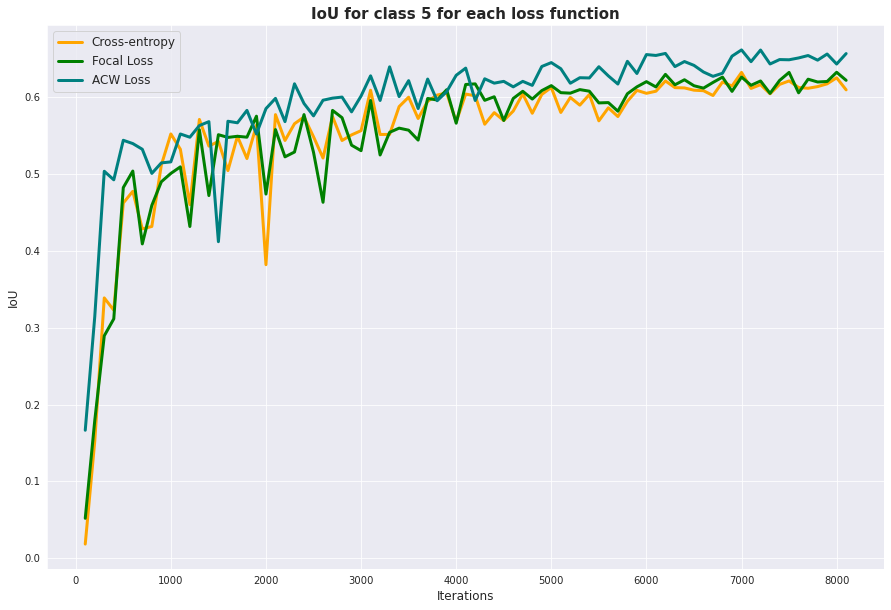

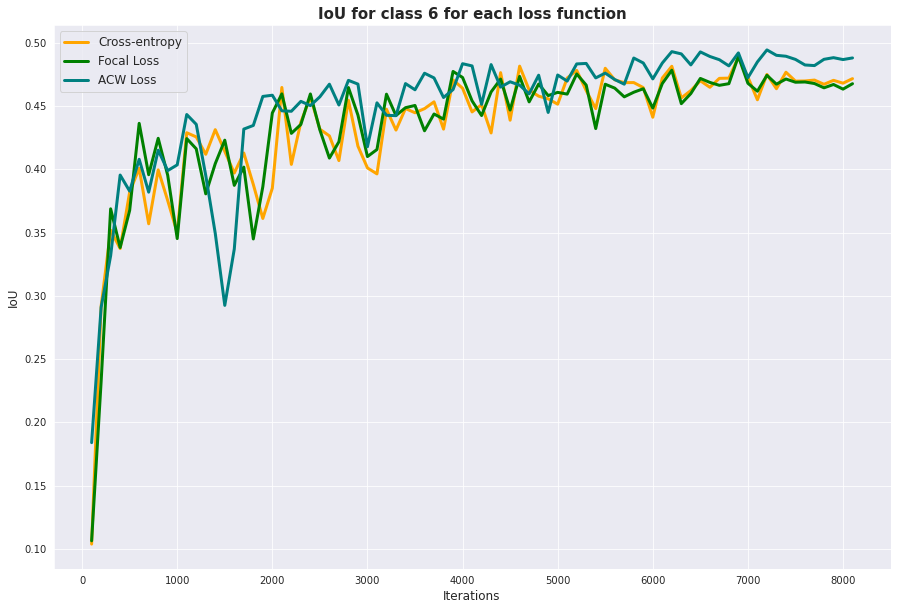

In [33]:
sns.set_style("darkgrid")
colors = ['orange', 'green', 'teal', 'dodgerblue', 'salmon', 'orangered', 'darkslategrey']
for class_ in range(0,7):
    plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(aug1_cross_df.Iterations,  aug1_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
    plt.plot(aug1_focal_loss_df.Iterations,  aug1_focal_loss_df[f'Class {class_} IoU'], 
             label="Focal Loss", color = colors[1], linewidth=3)
    plt.plot(aug1_acw_loss_df.Iterations,  aug1_acw_loss_df[f'Class {class_} IoU'], 
             label="ACW Loss", color = colors[2], linewidth=3)
#     plt.plot(aug1_lovasz_loss_df.Iterations, aug1_lovasz_loss_df[f'Class {class_} IoU'], 
#              label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    plt.show()

## 3.1 Augmentation 2

In [34]:
loss_fns = ['acw_loss'] #['cross_entropy', 'focal_loss', 'acw_loss', 'lovasz_loss']
aug2_dfs_eval = []
aug2_dfs_train = []
for loss_fn in loss_fns:
    aug2_results = f"./results_augmentations/aug_2/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(aug2_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(aug2_results, 'os_32/train_results.csv'))
    aug2_dfs_eval.append(df)
    aug2_dfs_train.append(df_2)

### ACW Augmented loss

### Cross entropy loss

In [35]:
aug2_cross_df = aug2_dfs_eval[0]
aug2_cross_df[aug2_cross_df['Mean IoUs'] == aug2_cross_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
70,5,7100,0.433417,0.777845,0.487006,0.074411,0.001331,0.574665,0.653473,0.465187,0.565981,0.812204


### Focal loss

In [36]:
aug2_focal_loss_df = aug2_dfs_eval[1]
aug2_focal_loss_df[aug2_focal_loss_df['Mean IoUs'] == aug2_focal_loss_df['Mean IoUs'].max()]

IndexError: list index out of range

### ACW loss

In [ ]:
aug2_acw_loss_df = aug2_dfs_eval[2]
aug2_acw_loss_df[aug2_acw_loss_df['Mean IoUs'] == aug2_acw_loss_df['Mean IoUs'].max()]

### Lovasz loss

In [ ]:
# aug2_lovasz_df = aug2_dfs_eval[3]
# aug2_lovasz_df[aug2_lovasz_df['Mean IoUs'] == aug2_lovasz_df['Mean IoUs'].max()]

### Training Loss visualization

In [ ]:
#aug2_cross_e_train_df = aug2_dfs_train[0]
#aug2_focal_loss_train_df = aug2_dfs_train[1]
aug2_acw_loss_train_df = aug2_dfs_train[2]
#aug2_lovasz_loss_train_df = aug2_dfs_train[3]

In [ ]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
# plt.plot(aug2_cross_e_train_df.Iterations, aug2_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
# plt.plot(aug2_focal_loss_train_df.Iterations, aug2_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
plt.plot(aug2_acw_loss_train_df.Iterations, aug2_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
#plt.plot(aug2_lovasz_loss_train_df.Iterations, aug2_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

In [ ]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
# plt.plot(aug2_cross_df.Iterations, aug2_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
# plt.plot(aug2_focal_loss_df.Iterations, aug2_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
plt.plot(aug2_acw_loss_df.Iterations, aug2_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
#plt.plot(aug2_lovasz_loss_df.Iterations, aug2_lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

In [ ]:
sns.set_style("darkgrid")
colors = ['orange', 'green', 'teal', 'dodgerblue', 'salmon', 'orangered', 'darkslategrey']
for class_ in range(0,7):
    plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
#     plt.plot(aug2_cross_df.Iterations,  aug2_cross_df[f'Class {class_} IoU'], 
#              label="Cross-entropy", color = colors[0], linewidth=3)
#     plt.plot(aug2_focal_loss_df.Iterations,  aug2_focal_loss_df[f'Class {class_} IoU'], 
#              label="Focal Loss", color = colors[1], linewidth=3)
    plt.plot(aug2_acw_loss_df.Iterations,  aug2_acw_loss_df[f'Class {class_} IoU'], 
             label="ACW Loss", color = colors[2], linewidth=3)
#     plt.plot(aug2_lovasz_loss_df.Iterations, aug2_lovasz_loss_df[f'Class {class_} IoU'], 
#              label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    plt.show()

## 3. Results of oversampling

## 3.1 Oversampling 1

In [38]:
loss_fns = ['cross_entropy']#, 'focal_loss', 'acw_loss', 'lovasz_loss']
overs1_dfs_eval = []
overs1_dfs_train = []
for loss_fn in loss_fns:
    overs1_results = f"./oversample_results/{loss_fn}/progress"
    df = pd.read_csv(os.path.join(overs1_results, 'os_32/eval_results.csv'))
    df_2 = pd.read_csv(os.path.join(overs1_results, 'os_32/train_results.csv'))
    overs1_dfs_eval.append(df)
    overs1_dfs_train.append(df_2)

### ACW Augmented loss

### Cross entropy loss

In [43]:
overs1_cross_df = overs1_dfs_eval[0]
overs1_cross_df[overs1_cross_df['Mean IoUs'] == overs1_cross_df['Mean IoUs'].max()]

,Epochs,Iterations,Mean IoUs,Class 0 IoU,Class 1 IoU,Class 2 IoU,Class 3 IoU,Class 4 IoU,Class 5 IoU,Class 6 IoU,Mean Accs.,Overall Accs.
54,4,5500,0.443221,0.753917,0.487604,0.205509,0.001252,0.603971,0.578438,0.471852,0.6131,0.79602


### Focal loss

In [44]:
# overs1_focal_loss_df = overs1_dfs_eval[1]
# overs1_focal_loss_df[overs1_focal_loss_df['Mean IoUs'] == overs1_focal_loss_df['Mean IoUs'].max()]

### ACW loss

In [45]:
# overs1_acw_loss_df = overs1_dfs_eval[2]
# overs1_acw_loss_df[overs1_acw_loss_df['Mean IoUs'] == overs1_acw_loss_df['Mean IoUs'].max()]

### Lovasz loss

In [46]:
# overs1_lovasz_df = overs1_dfs_eval[3]
# overs1_lovasz_df[overs1_lovasz_df['Mean IoUs'] == overs1_lovasz_df['Mean IoUs'].max()]

### Training Loss visualization

In [47]:
overs1_cross_e_train_df = overs1_dfs_train[0]
# overs1_focal_loss_train_df = overs1_dfs_train[1]
# overs1_acw_loss_train_df = overs1_dfs_train[2]
#overs1_lovasz_loss_train_df = overs1_dfs_train[3]

Text(0, 0.5, 'Loss')

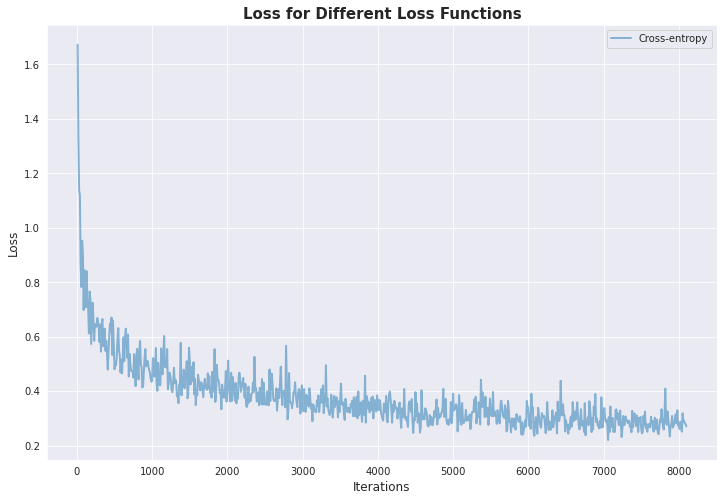

In [48]:
sns.set_style("darkgrid")
plt.subplots(figsize=(12,8))
plt.title("Loss for Different Loss Functions", fontweight = 'bold', fontsize=15)
plt.plot(overs1_cross_e_train_df.Iterations, overs1_cross_e_train_df.Loss, label="Cross-entropy", alpha=0.5, linewidth=2)
# plt.plot(overs1_focal_loss_train_df.Iterations, overs1_focal_loss_train_df.Loss, label="Focal Loss", alpha=0.5, linewidth=2)
# plt.plot(overs1_acw_loss_train_df.Iterations, overs1_acw_loss_train_df.Loss, label="ACW Loss", alpha=0.5, linewidth=2)
#plt.plot(overs1_lovasz_loss_train_df.Iterations, overs1_lovasz_loss_train_df.Loss, label="Lovasz Loss", alpha=0.5, linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Loss', fontsize=12)

### Mean IoU visualization

NameError: name 'overs1_focal_loss_df' is not defined

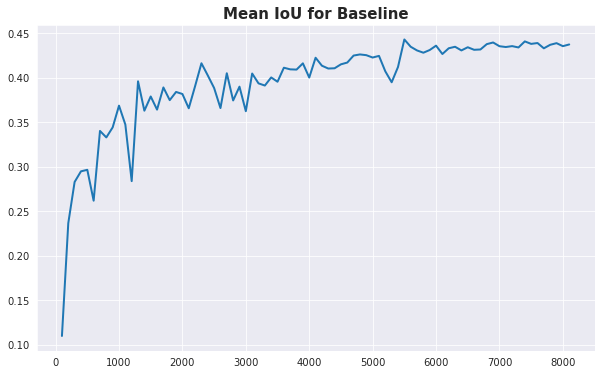

In [49]:
sns.set_style("darkgrid")
plt.subplots(figsize=(10,6))
plt.title("Mean IoU for Baseline", fontweight = 'bold', fontsize=15)
plt.plot(overs1_cross_df.Iterations, overs1_cross_df['Mean IoUs'], label="Cross-entropy", linewidth=2)
plt.plot(overs1_focal_loss_df.Iterations, overs1_focal_loss_df['Mean IoUs'], label="Focal Loss", linewidth=2)
plt.plot(overs1_acw_loss_df.Iterations, overs1_acw_loss_df['Mean IoUs'], label="ACW Loss", linewidth=2)
plt.plot(overs1_lovasz_loss_df.Iterations, overs1_lovasz_loss_df['Mean IoUs'], label="Lovasz loss", linewidth=2)
plt.legend()
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Mean IoU', fontsize=12)

## Best Performing os: 32

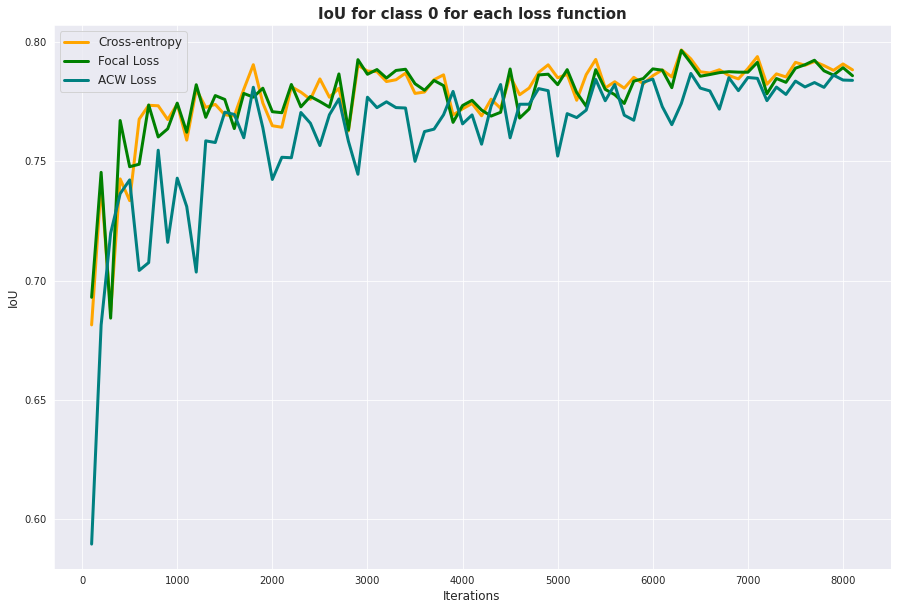

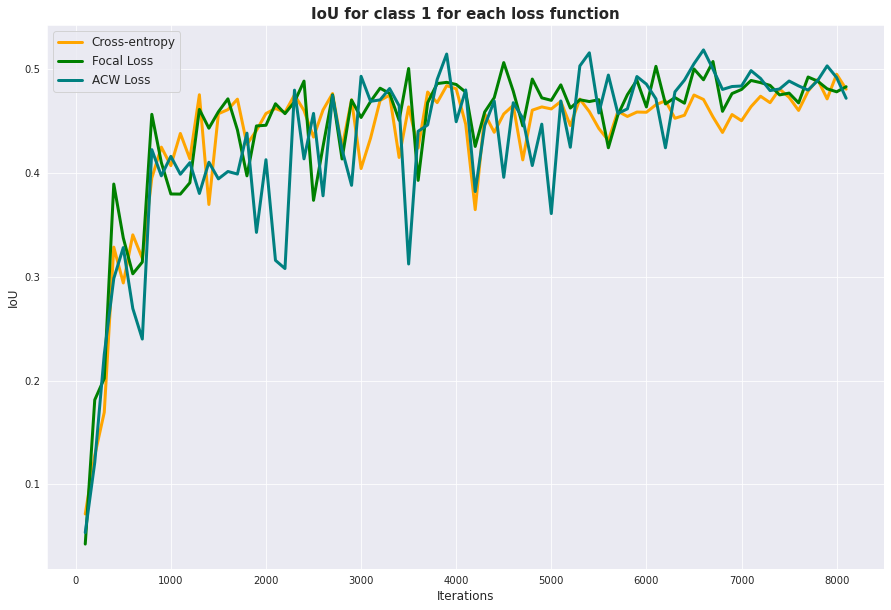

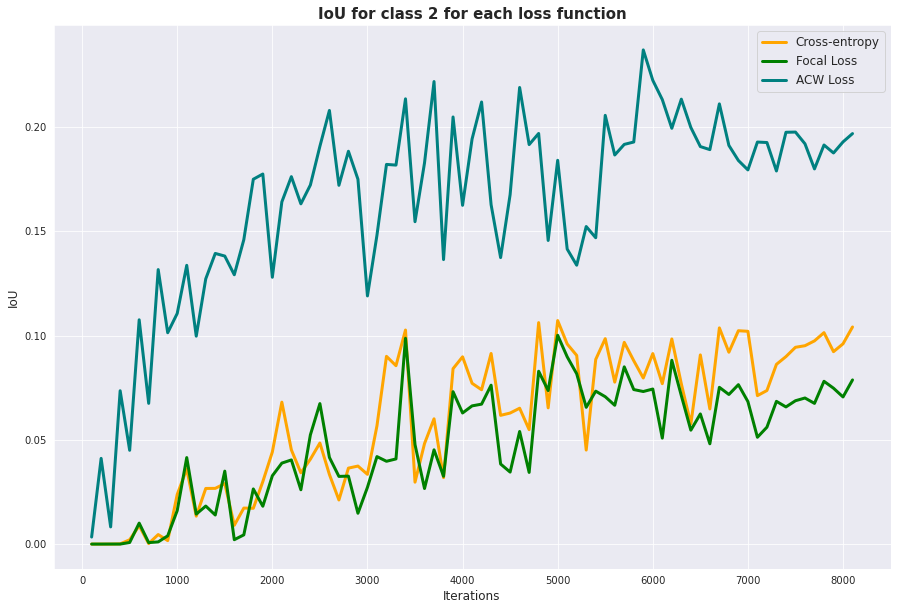

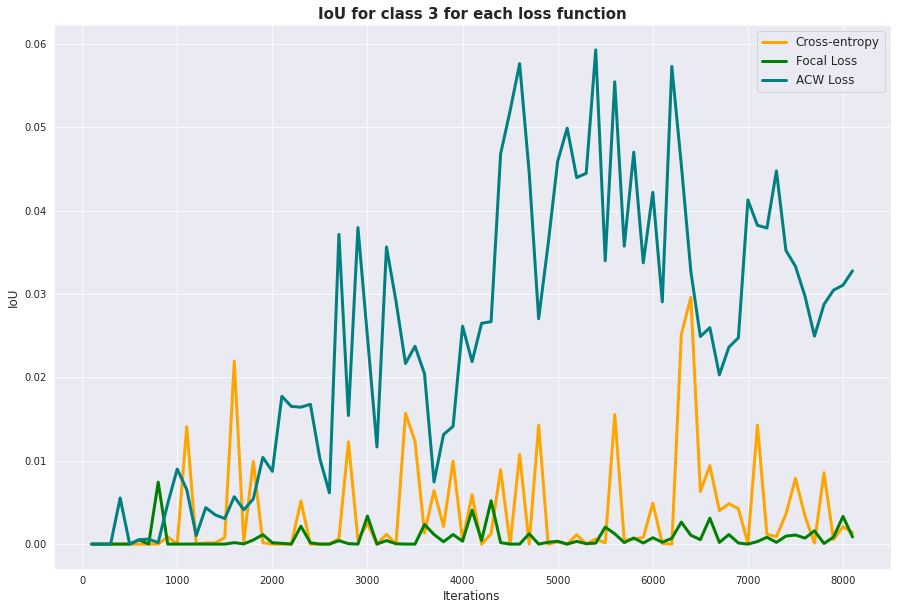

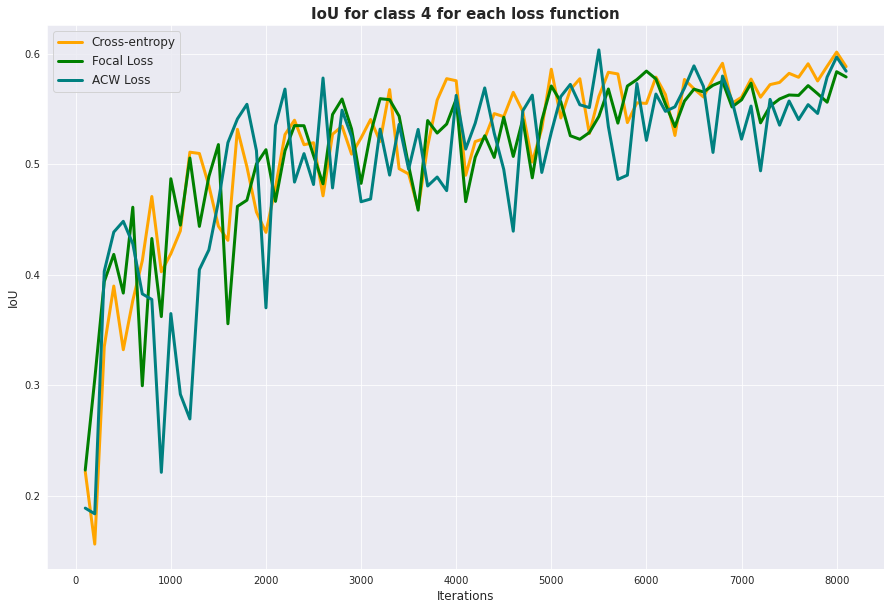

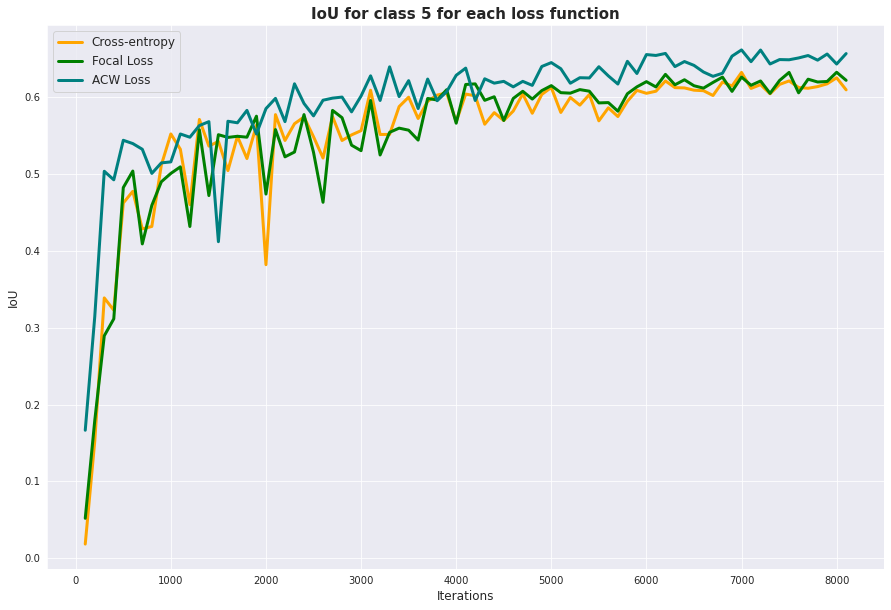

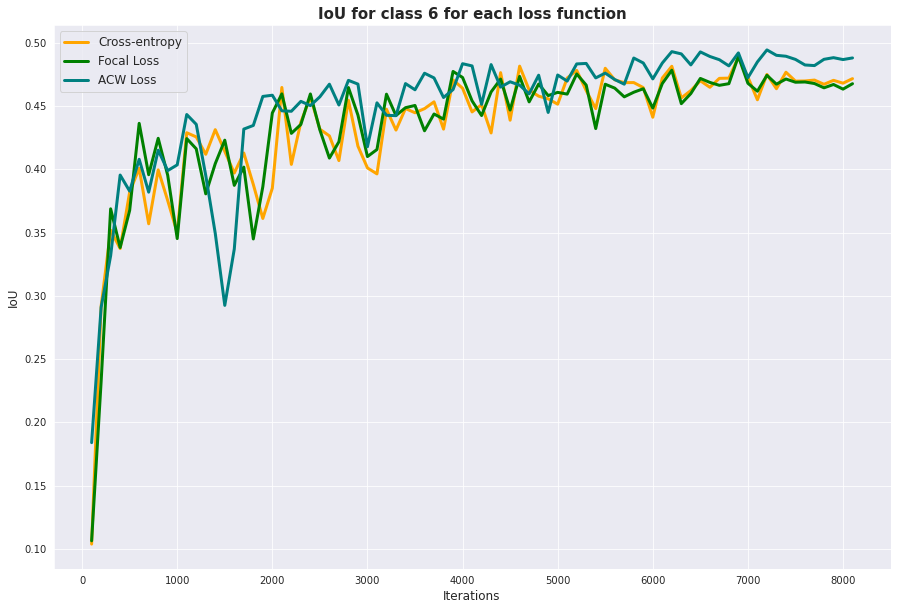

In [33]:
sns.set_style("darkgrid")
colors = ['orange', 'green', 'teal', 'dodgerblue', 'salmon', 'orangered', 'darkslategrey']
for class_ in range(0,7):
    plt.subplots(figsize=(15,10))
    plt.title(f"IoU for class {class_} for each loss function", fontweight = 'bold', fontsize=15)
    plt.plot(aug1_cross_df.Iterations,  aug1_cross_df[f'Class {class_} IoU'], 
             label="Cross-entropy", color = colors[0], linewidth=3)
    plt.plot(aug1_focal_loss_df.Iterations,  aug1_focal_loss_df[f'Class {class_} IoU'], 
             label="Focal Loss", color = colors[1], linewidth=3)
    plt.plot(aug1_acw_loss_df.Iterations,  aug1_acw_loss_df[f'Class {class_} IoU'], 
             label="ACW Loss", color = colors[2], linewidth=3)
#     plt.plot(aug1_lovasz_loss_df.Iterations, aug1_lovasz_loss_df[f'Class {class_} IoU'], 
#              label="Lovasz loss", color = colors[3], linewidth=3)    
    plt.legend(fontsize=12)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('IoU', fontsize=12)
    plt.show()